In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Preprocessing and Exploratory Analysis

In [8]:
cars = pd.read_csv("../car_price_prediction.csv")
cars

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## Preprocessing

In [9]:
# Check if the dataset contains NaN/null values
cars.isnull().values.any()

False

In [10]:
cars.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [68]:
# Check price for outliers by z-test and look for vals greater than 3 standard deviations
# from mean
price_outliers = cars[(np.abs(stats.zscore(cars["Price"])) >= 3)]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Manufacturer (Numeric),Model (Numeric)
1225,45795524,627220,-,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,25,943
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0,29,182
16983,45812886,26307500,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,1,1396


In [ ]:
# From market research, it is clear that the OpelCombo entry is a misentry and should be removed


In [11]:
manufacturers_unique = list(set(cars["Manufacturer"]))   # Get all unqiue manufacturers
models_unique = list(set(cars["Model"]))   # Get all unique models
gearbox_unique = list(set(cars["Gear box type"]))   # Get all unique gearboxes
color_unique = list(set(cars["Color"]))   # Get all unique colors
wheel_unique = list(set(cars["Wheel"]))   # Get all unique Wheels
doors_unique = list(set(cars["Doors"]))   # Get all unique doors
drivewheels_unique = list(set(cars["Drive wheels"]))   # Get all unique drive wheels
volume_unique = list(set(cars["Engine volume"]))   # Get all unique drive engine volumes
fuel_unique = list(set(cars["Fuel type"]))   # Get all unique drive engine fuels
category_unique = list(set(cars["Category"]))   # Get all unique drive category
leather_unique = list(set(cars["Leather interior"]))   # Get all unique drive category

#print(f"There are {len(manufacturer_set)} unique manufacturers and {len(models_set)} unique models. ")

In [12]:
# Convert Mileage to numeric


# Add columns to our dataframe containing numerical encodings of all string columns
cars["Manufacturer (Numeric)"] = [manufacturers_unique.index(x) for x in cars["Manufacturer"]]
cars["Model (Numeric)"] = [models_unique.index(x) for x in cars["Model"]]
cars["Gear box (Numeric)"] = [gearbox_unique.index(x) for x in cars["Gear box type"]]
cars["Color (Numeric)"] = [color_unique.index(x) for x in cars["Color"]]
cars["Wheel (Numeric)"] = [wheel_unique.index(x) for x in cars["Wheel"]]
cars["Doors (Numeric)"] = [doors_unique.index(x) for x in cars["Doors"]]
cars["Drive Wheels (Numeric)"] = [drivewheels_unique.index(x) for x in cars["Drive wheels"]]
cars["Engine Volume (Numeric)"] = [volume_unique.index(x) for x in cars["Engine volume"]]
cars["Fuel Type (Numeric)"] = [fuel_unique.index(x) for x in cars["Fuel type"]]
cars["Category (Numeric)"] = [category_unique.index(x) for x in cars["Category"]]
cars["Leather Interior (Numeric)"] = [leather_unique.index(x) for x in cars["Leather interior"]]

# Verify that our numeric encoding worked correctly by checking every numeric representation
# matches the correct index in our unique lists. 
print(all([manufacturers_unique[x] == y for x, y in zip(cars["Manufacturer (Numeric)"], cars["Manufacturer"])]))
print(all([models_unique[x] == y for x, y in zip(cars["Model (Numeric)"], cars["Model"])]))
print(all([gearbox_unique[x] == y for x, y in zip(cars["Gear box (Numeric)"], cars["Gear box type"])]))
print(all([color_unique[x] == y for x, y in zip(cars["Color (Numeric)"], cars["Color"])]))
print(all([wheel_unique[x] == y for x, y in zip(cars["Wheel (Numeric)"], cars["Wheel"])]))
print(all([doors_unique[x] == y for x, y in zip(cars["Doors (Numeric)"], cars["Doors"])]))
print(all([drivewheels_unique[x] == y for x, y in zip(cars["Drive Wheels (Numeric)"], cars["Drive wheels"])]))
print(all([volume_unique[x] == y for x, y in zip(cars["Engine Volume (Numeric)"], cars["Engine volume"])]))
print(all([fuel_unique[x] == y for x, y in zip(cars["Fuel Type (Numeric)"], cars["Fuel type"])]))
print(all([category_unique[x] == y for x, y in zip(cars["Category (Numeric)"], cars["Category"])]))
print(all([leather_unique[x] == y for x, y in zip(cars["Leather Interior (Numeric)"], cars["Leather interior"])]))

cars["Mileage(km) (Numeric)"] = [int(x.split(" ")[0]) for x in cars["Mileage"]]

# cars

True
True
True
True
True
True
True
True
True
True
True


In [13]:
cars    # TODO Handle levy
cars.select_dtypes(include=np.number)

,ID,Price,Prod. year,Cylinders,Airbags,Manufacturer (Numeric),Model (Numeric),Gear box (Numeric),Color (Numeric),Wheel (Numeric),Doors (Numeric),Drive Wheels (Numeric),Engine Volume (Numeric),Fuel Type (Numeric),Category (Numeric),Leather Interior (Numeric),Mileage(km) (Numeric)
0,45654403,13328,2010,6.0,12,42,1132,1,5,0,1,2,50,1,4,0,186005
1,44731507,16621,2011,6.0,8,37,895,3,13,0,1,2,14,6,4,1,192000
2,45774419,8467,2006,4.0,2,60,390,2,13,1,1,0,85,6,6,1,200000
3,45769185,3607,2011,4.0,0,26,31,1,10,0,1,2,59,1,4,0,168966
4,45809263,11726,2014,4.0,4,60,390,1,5,0,1,0,85,6,6,0,91901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,1999,4.0,5,62,1559,0,5,0,2,1,74,5,0,0,300000
19233,45778856,15681,2011,4.0,8,28,1151,3,0,0,1,0,70,6,8,0,161600
19234,45804997,26108,2010,4.0,4,28,5,1,15,0,1,0,68,4,4,0,116365
19235,45793526,5331,2007,4.0,4,37,1485,1,13,0,1,0,68,4,4,0,51258


## Exploratory Analysis

In [30]:
# Summary stats
cars.describe()

,ID,Price,Prod. year,Cylinders,Airbags,Manufacturer (Numeric),Model (Numeric)
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627,35.102303,764.606384
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168,20.404409,462.872126
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000,0.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000,16.000000,339.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000,28.000000,872.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000,61.000000,1127.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000,64.000000,1589.000000


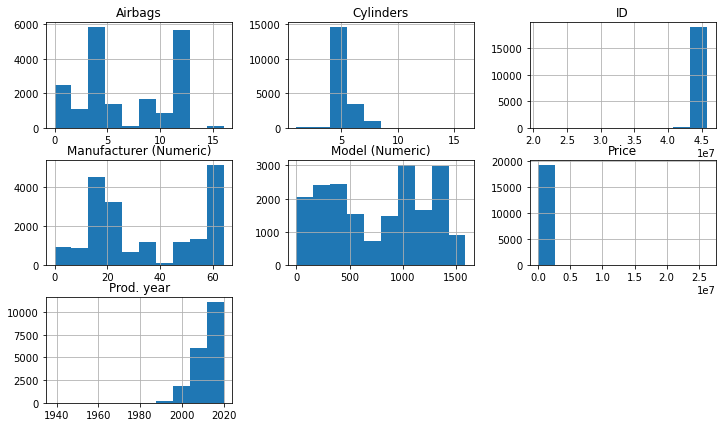

In [43]:
plt.rcParams["figure.figsize"] = (12, 7)
cars.hist()
plt.show()

Text(0, 0.5, 'Price')

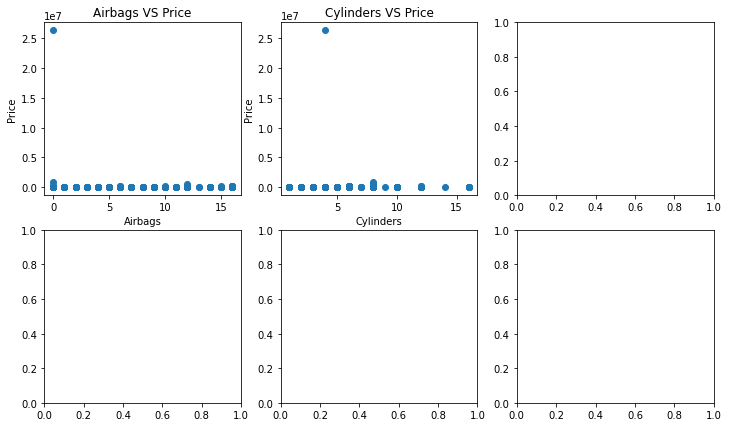

In [54]:
# plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(2, 3)

# Plot airbags vs price
axes[0, 0].scatter(cars["Airbags"], cars["Price"])
axes[0, 0].set_title("Airbags VS Price")
axes[0, 0].set_xlabel("Airbags")
axes[0, 0].set_ylabel("Price")

# Plot cylinders vs price
axes[0, 1].scatter(cars["Cylinders"], cars["Price"])
axes[0, 1].set_title("Cylinders VS Price")
axes[0, 1].set_xlabel("Cylinders")
axes[0, 1].set_ylabel("Price")

In [59]:
cars.iloc[cars["Price"].idxmax()]

ID                           45812886
Price                        26307500
Levy                                -
Manufacturer                     OPEL
Model                           Combo
Prod. year                       1999
Category                  Goods wagon
Leather interior                   No
Fuel type                      Diesel
Engine volume                     1.7
Mileage                      99999 km
Cylinders                           4
Gear box type                  Manual
Drive wheels                    Front
Doors                          02-Mar
Wheel                      Left wheel
Color                            Blue
Airbags                             0
Manufacturer (Numeric)              1
Model (Numeric)                  1396
Name: 16983, dtype: object

In [16]:
for i in cars["Levy"]:
    if i == "-":
        cars["Levy"][i] = "0"

C:\Users\neptu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
ln = []
for i in cars["Levy"]:
    try:
        ln += [int(i)]
    except:
        ln += [np.NaN]
        
ln

[1399,
 1018,
 nan,
 862,
 446,
 891,
 761,
 751,
 394,
 nan,
 1053,
 nan,
 nan,
 1055,
 891,
 1079,
 810,
 810,
 2386,
 1850,
 531,
 586,
 1249,
 nan,
 nan,
 nan,
 2455,
 nan,
 583,
 1537,
 1288,
 915,
 nan,
 1750,
 nan,
 707,
 1077,
 1486,
 531,
 1399,
 751,
 1091,
 650,
 382,
 1436,
 1194,
 503,
 1017,
 nan,
 nan,
 891,
 1104,
 nan,
 1017,
 639,
 nan,
 nan,
 629,
 919,
 781,
 530,
 nan,
 530,
 nan,
 640,
 765,
 777,
 1091,
 779,
 nan,
 934,
 769,
 1249,
 891,
 645,
 nan,
 1053,
 nan,
 2455,
 1185,
 1324,
 830,
 1187,
 nan,
 781,
 531,
 639,
 1111,
 760,
 642,
 1604,
 nan,
 781,
 1095,
 891,
 nan,
 nan,
 nan,
 nan,
 966,
 473,
 1138,
 382,
 1811,
 nan,
 988,
 765,
 917,
 917,
 nan,
 nan,
 1156,
 1091,
 687,
 nan,
 11714,
 nan,
 nan,
 640,
 836,
 779,
 nan,
 777,
 1537,
 765,
 781,
 639,
 891,
 394,
 nan,
 1347,
 nan,
 2866,
 nan,
 862,
 503,
 nan,
 1811,
 1646,
 nan,
 1017,
 639,
 259,
 751,
 nan,
 609,
 697,
 nan,
 639,
 nan,
 585,
 891,
 1399,
 394,
 781,
 891,
 475,
 690,
 nan,
 1

In [19]:
#[int(x) for x in cars["Levy"]]
cars[cars["Levy"] == "-"]

C:\Users\neptu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Gear box (Numeric),Color (Numeric),Wheel (Numeric),Doors (Numeric),Drive Wheels (Numeric),Engine Volume (Numeric),Fuel Type (Numeric),Category (Numeric),Leather Interior (Numeric),Mileage(km) (Numeric)
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,2,13,1,1,0,85,6,6,1,200000
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,...,1,5,0,1,2,50,6,4,0,128500
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,...,0,3,0,2,1,12,5,9,1,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,...,0,10,0,1,0,88,5,1,1,350000
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,...,0,10,0,2,0,74,4,9,1,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,...,1,3,0,1,0,70,6,6,1,0
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,...,1,13,0,1,0,70,6,8,0,35800
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,...,3,10,1,1,1,14,6,8,0,220000
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,...,1,5,0,1,0,67,1,6,1,150000
